In [8]:
import numpy as np
from PySeismoSoil.class_ground_motion import Ground_Motion
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') 

In [9]:
def get_sine_displacement(amplitude: float,
                        ex_freq: float, 
                        cycles: float, 
                        sampling_freq: float) -> pd.DataFrame:
    r'''
    Calculate a sine shape time history of displacement.
    
    Args:
        amplitude (float): amplitude of the sine disp. -[meters]
        ex_freq (float): excitation frequency. -[Hz]
        cycles (float): number of cycles
        sampling freq (float): sampling frequency -[Hz]
    
    Returns:
        df_out (pd.DataFrame): dataframe with time history
        
    ::Note:
        `sampling_freq` needs to be at least 2 times of `ex_freq`
    
    '''
    duration = cycles/ex_freq
    num_of_data = int(sampling_freq*duration)
    time_arr = np.linspace(0, duration, num=num_of_data)
    disp_arr = amplitude * np.sin(time_arr*np.pi*2*ex_freq)
    print(f'sum of Disp = {np.sum(disp_arr)}')
    if sampling_freq<10*ex_freq:
        warnings.warn("Sampling freq is too low", UserWarning)
    df_out = {'Time': time_arr,
            'Disp': disp_arr}
    df_out = pd.DataFrame(df_out)
    
    #generate a plot
    df_out.plot(x='Time', y='Disp', title='Displacement')
    plt.xlabel('Time')
    plt.ylabel('Displacement, m')
    plt.show()
    return df_out

sum of Disp = 9.947598300641403e-14


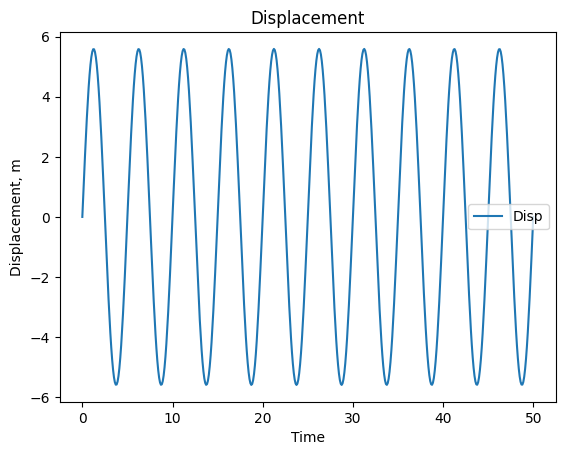

,Time,Disp
0,0.000000,0.000000e+00
1,0.100200,7.021387e-01
2,0.200401,1.393160e+00
3,0.300601,2.062122e+00
4,0.400802,2.698433e+00
...,...,...
495,49.599198,-2.698433e+00
496,49.699399,-2.062122e+00
497,49.799599,-1.393160e+00
498,49.899800,-7.021387e-01


In [12]:
amplitude_g = 0.9
cycles = 10.0
ex_freq = 0.2
sampling_freq = ex_freq * 50.0
amplitude = amplitude_g/(2*np.pi*ex_freq)**2*9.81
df_out = get_sine_displacement(amplitude,ex_freq, cycles, sampling_freq)
df_out

In [16]:
'''
filepath = r"D:\Research\Paper\IrregularDamping\motions\0.2_Hz_accel_0.9g.txt"
df = pd.read_csv(filepath, skiprows=1, header=None, sep='\t')
df = df.rename(columns={0: 'Time', 1:'Accel_g'})
df['Accel_m_s_s'] = df['Accel_g'] * 9.81
df
'''

'\nfilepath = r"D:\\Research\\Paper\\IrregularDamping\\motions\x00.2_Hz_accel_0.9g.txt"\ndf = pd.read_csv(filepath, skiprows=1, header=None, sep=\'\t\')\ndf = df.rename(columns={0: \'Time\', 1:\'Accel_g\'})\ndf[\'Accel_m_s_s\'] = df[\'Accel_g\'] * 9.81\ndf\n'

In [18]:
time_values = df_out['Time'].values
disp_values = df_out['Disp'].values
data = np.column_stack((time_values, disp_values))
data

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.00200401e-01,  7.02138685e-01],
       [ 2.00400802e-01,  1.39315986e+00],
       [ 3.00601202e-01,  2.06212203e+00],
       [ 4.00801603e-01,  2.69843301e+00],
       [ 5.01002004e-01,  3.29201758e+00],
       [ 6.01202405e-01,  3.83347704e+00],
       [ 7.01402806e-01,  4.31423805e+00],
       [ 8.01603206e-01,  4.72668834e+00],
       [ 9.01803607e-01,  5.06429726e+00],
       [ 1.00200401e+00,  5.32171918e+00],
       [ 1.10220441e+00,  5.49487814e+00],
       [ 1.20240481e+00,  5.58103237e+00],
       [ 1.30260521e+00,  5.57881773e+00],
       [ 1.40280561e+00,  5.48826929e+00],
       [ 1.50300601e+00,  5.31082076e+00],
       [ 1.60320641e+00,  5.04928184e+00],
       [ 1.70340681e+00,  4.70779367e+00],
       [ 1.80360721e+00,  4.29176330e+00],
       [ 1.90380762e+00,  3.80777807e+00],
       [ 2.00400802e+00,  3.26350130e+00],
       [ 2.10420842e+00,  2.66755095e+00],
       [ 2.20440882e+00,  2.02936316e+00],
       [ 2.

In [23]:
ground_motion = Ground_Motion(data, unit='m', motion_type='displ')

(<Figure size 500x600 with 3 Axes>,
 (<Axes: ylabel='Acceleration [m/s/s]'>,
  <Axes: ylabel='Velocity [m/s]'>,
  <Axes: xlabel='Time [sec]', ylabel='Displacement [m]'>))

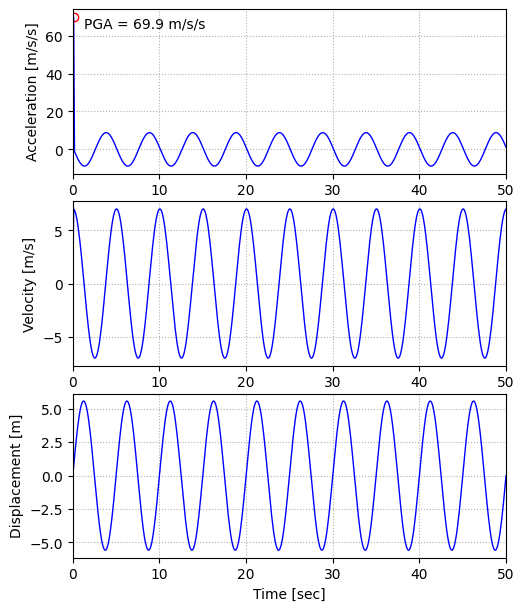

In [24]:
ground_motion.plot()

### Baseline Correction

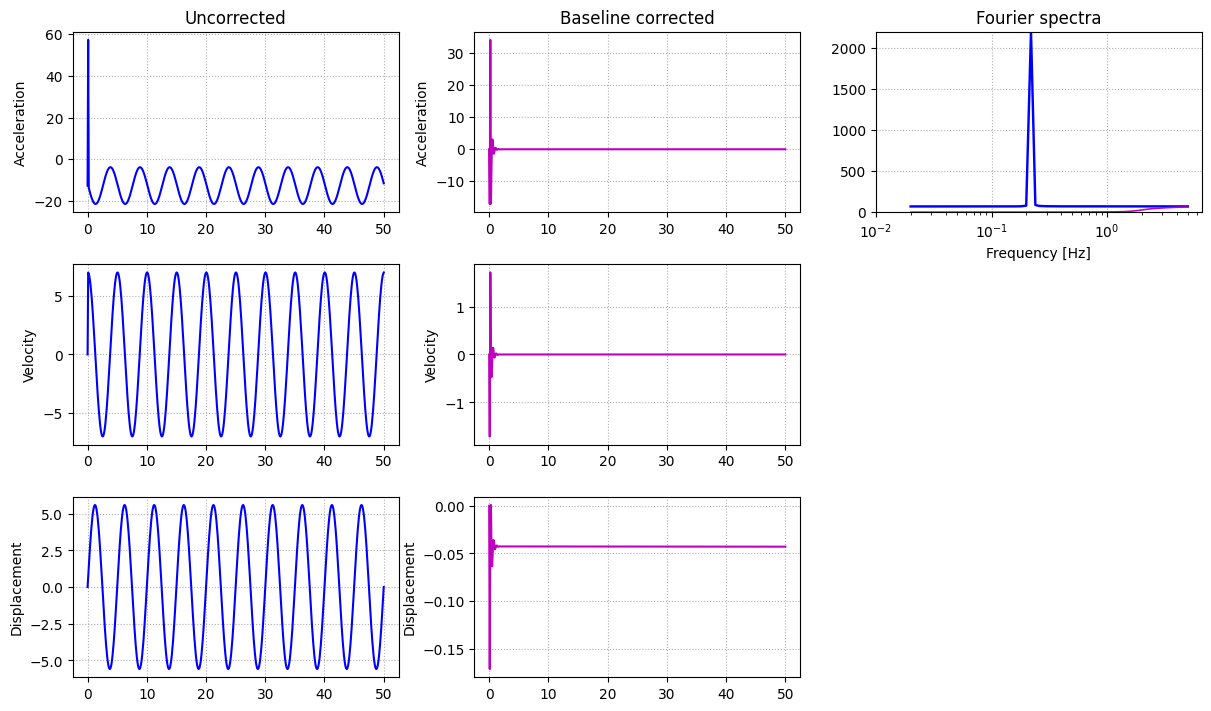

In [29]:
corrected = ground_motion.baseline_correct(cutoff_freq=2, show_fig=True)

#### Truncate by `Arias Intensity`

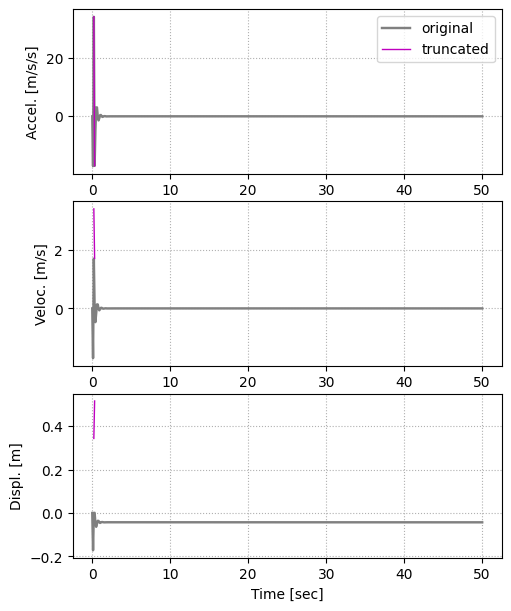

In [30]:
truncated = corrected.truncate([0.01, 0.95], arias=True, show_fig=True)

#### Truncate by `Time`

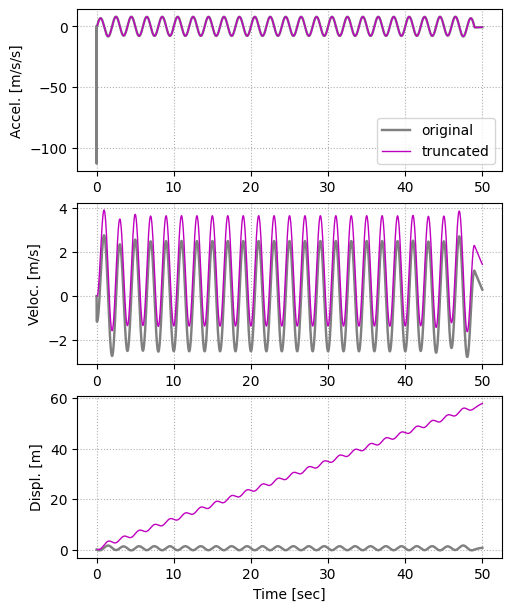

In [38]:
truncated = corrected.truncate([0.1, 50.0], arias=False, show_fig=True)